#### 1.Why Data Visualization?
#### 2.Understanding Matplotlib.
####  3.Backends
#### 4.Types of plot
#### 5.Seaborn package



<h1 align=center><font size = 5>Introduction to Matplotlib and Line Plots</font></h1>

## The Dataset: Immigration to Canada from 1980 to 2013 <a id="2"></a>

The first thing we'll do is import two key data analysis modules: *pandas* and **Numpy**.

In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [3]:
#Reading a data in a data frame
df_can = pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)



Let's view the top 5 rows of the dataset using the `head()` function.

In [4]:
df_can.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


When analyzing a dataset, it's always a good idea to start by getting basic information about your dataframe. We can do this by using the `info()` method.

In [5]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
Type        195 non-null object
Coverage    195 non-null object
OdName      195 non-null object
AREA        195 non-null int64
AreaName    195 non-null object
REG         195 non-null int64
RegName     195 non-null object
DEV         195 non-null int64
DevName     195 non-null object
1980        195 non-null int64
1981        195 non-null int64
1982        195 non-null int64
1983        195 non-null int64
1984        195 non-null int64
1985        195 non-null int64
1986        195 non-null int64
1987        195 non-null int64
1988        195 non-null int64
1989        195 non-null int64
1990        195 non-null int64
1991        195 non-null int64
1992        195 non-null int64
1993        195 non-null int64
1994        195 non-null int64
1995        195 non-null int64
1996        195 non-null int64
1997        195 non-null int64
1998        195 non-null int64
1999        195 non-n

To get the list of column headers we can call upon the dataframe's `.columns` parameter.

In [5]:
df_can.columns.values


array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

Similarly, to get the list of indicies we use the `.index` parameter.

In [6]:
print(type(df_can.columns))
print(type(df_can.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


To view the dimensions of the dataframe, we use the `.shape` parameter.

In [7]:
# size of dataframe (rows, columns)
df_can.shape    

(195, 43)

Let's clean the data set to remove a few unnecessary columns. We can use *pandas* `drop()` method as follows:

In [9]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

KeyError: "['AREA' 'REG' 'DEV' 'Type' 'Coverage'] not found in axis"

We can check to see how many null objects we have in the dataset as follows:

In [10]:
df_can.isnull().sum()

OdName      0
AreaName    0
RegName     0
DevName     0
1980        0
1981        0
1982        0
1983        0
1984        0
1985        0
1986        0
1987        0
1988        0
1989        0
1990        0
1991        0
1992        0
1993        0
1994        0
1995        0
1996        0
1997        0
1998        0
1999        0
2000        0
2001        0
2002        0
2003        0
2004        0
2005        0
2006        0
2007        0
2008        0
2009        0
2010        0
2011        0
2012        0
2013        0
dtype: int64

Finally, let's view a quick summary of each column in our dataframe using the `describe()` method.

In [11]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1190.169231,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,3710.505369,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,19.000000,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,191.000000,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,756.500000,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000


---
## *pandas* Intermediate: Indexing and Selection (slicing)<a id="6"></a>


In [12]:
#df_can['OdName']
df_can.OdName

0                                            Afghanistan
1                                                Albania
2                                                Algeria
3                                         American Samoa
4                                                Andorra
5                                                 Angola
6                                    Antigua and Barbuda
7                                              Argentina
8                                                Armenia
9                                              Australia
10                                               Austria
11                                            Azerbaijan
12                                               Bahamas
13                                               Bahrain
14                                            Bangladesh
15                                              Barbados
16                                               Belarus
17                             

In [13]:
df_can[['OdName', 1980, 1981, 1982, 1983, 1984, 1985]]#.set_index('OdName') # returns a dataframe
# notice that 'Country' is string, and the years are integers. 
# for the sake of consistency, we will convert all column names to string later on.

,OdName,1980,1981,1982,1983,1984,1985
0,Afghanistan,16,39,39,47,71,340
1,Albania,1,0,0,0,0,0
2,Algeria,80,67,71,69,63,44
3,American Samoa,0,1,0,0,0,0
4,Andorra,0,0,0,0,0,0
5,Angola,1,3,6,6,4,3
6,Antigua and Barbuda,0,0,0,0,42,52
7,Argentina,368,426,626,241,237,196
8,Armenia,0,0,0,0,0,0
9,Australia,702,639,484,317,317,319


### Select Row

There are main 3 ways to select rows:

```python
    df.loc[label]        
        #filters by the labels of the index/column
    df.iloc[index]       
        #filters by the positions of the index/column
```

In [15]:
df_can.set_index('OdName', inplace=True)
# tip: The opposite of set is reset. So to reset the index, we can use df_can.reset_index()

KeyError: 'OdName'

In [17]:
df_can.head(3)

,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
OdName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331


In [18]:
df_can.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Western Sahara',
       'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='OdName', length=195)

In [19]:
# optional: to remove the name of the index
df_can.index.name = 'Country'
df_can

,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1
Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,5,...,268,295,184,106,76,62,61,39,70,45
Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,51,...,14,24,32,15,32,38,27,37,51,25
Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,213,...,1591,1153,847,620,540,467,459,278,263,282
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,147,224,218,198,205,267,252,236,258,207


Example: Let's view the number of immigrants from Japan (row 87) for the following scenarios:
    1. The full row data (all columns)
    2. For year 2013
    3. For years 1980 to 1985

In [22]:
# 1. the full row data (all columns)
#print(df_can.loc['Japan']) #label based access

# alternate methods
print(df_can.iloc[87]) #position based access
#print(df_can.at['Afghanistan','AreaName'])


AreaName                 Asia
RegName          Eastern Asia
DevName     Developed regions
1980                      701
1981                      756
1982                      598
1983                      309
1984                      246
1985                      198
1986                      248
1987                      422
1988                      324
1989                      494
1990                      379
1991                      506
1992                      605
1993                      907
1994                      956
1995                      826
1996                      994
1997                      924
1998                      897
1999                     1083
2000                     1010
2001                     1092
2002                      806
2003                      817
2004                      973
2005                     1067
2006                     1212
2007                     1250
2008                     1284
2009                     1194
2010      

In [23]:
# 2. for year 2013
print(df_can.loc['Japan', 2013])

# alternate method
#print(df_can.iloc[87, 20]) # year 2013 is the last column, with a positional index of 36

982


In [21]:
df_can

,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1
Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,5,...,268,295,184,106,76,62,61,39,70,45
Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,51,...,14,24,32,15,32,38,27,37,51,25
Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,213,...,1591,1153,847,620,540,467,459,278,263,282
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,147,224,218,198,205,267,252,236,258,207


In [24]:
# 3. for years 1980 to 1985
print(df_can.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1984]])
#print(df_can.iloc[87, [3, 4, 5, 6, 7, 8]])

1980    701
1981    756
1982    598
1983    309
1984    246
1984    246
Name: Japan, dtype: object


---
# Visualizing Data using Matplotlib<a id="8"></a>

## Matplotlib: Standard Python Visualization Library<a id="10"></a>

The primary plotting library we will explore in these session is [Matplotlib](http://matplotlib.org/).  
>Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

If you are aspiring to create impactful visualization with python, Matplotlib is an essential tool to have at your disposal.

### Matplotlib.Pyplot

One of the core aspects of Matplotlib is `matplotlib.pyplot`.Each `pyplot` function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.


Let's start by importing `Matplotlib` and `Matplotlib.pyplot` as follows:

In [25]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [26]:
print(plt.style.available)
#mpl.style.use(['fivethirtyeight']) # optional: for ggplot-like style

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


### Plotting in *pandas*

Fortunately, pandas has a built-in implementation of Matplotlib that we can use. Plotting in *pandas* is as simple as appending a `.plot()` method to a series or dataframe.



# Line Pots (Series/Dataframe) <a id="12"></a>

**What is a line plot and why use it?**

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields.
Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.

**Question:** Plot a line graph of immigration from Haiti using `df.plot()` passing in years 1980 - 2013.


First, we will extract the data series for Haiti.

In [ ]:
li = [i for i in range(10)]
li

In [27]:
years = [year for year in range(1980,2014)]
haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
1985    1321
1986    1753
1987    2132
1988    1829
1989    2377
1990    2379
1991    2829
1992    2399
1993    3655
1994    2100
1995    2014
1996    1955
1997    1645
1998    1295
1999    1439
2000    1631
2001    2433
2002    2174
2003    1930
2004    1652
2005    1682
2006    1619
2007    1598
2008    2491
2009    2080
2010    4744
2011    6503
2012    5868
2013    4152
Name: Haiti, dtype: object

Next, we will plot a line plot by appending `.plot()` to the `haiti` dataframe.

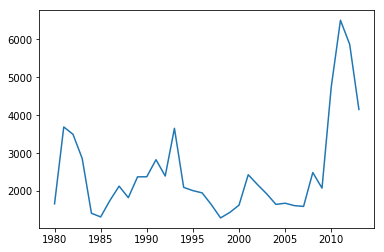

In [28]:
haiti.plot()

Also, let's label the x and y axis using `plt.title()`, `plt.ylabel()`, and `plt.xlabel()` as follows:

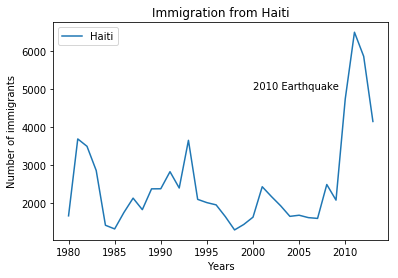

In [31]:
haiti.plot(kind='line',label = 'Haiti')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.text(2000, 5000, '2010 Earthquake') 
plt.xlabel('Years')
plt.legend()
plt.show() 